In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [4]:
label_encode_columns = ['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

label_encoders = {}

for column in label_encode_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [6]:
na_columns = list(df.columns.values)

for column in na_columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column] = df[column].fillna(df[column].median())
    else:
        df[column] = df[column].fillna(df[column].mode()[0])
        
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,3431,41,2.8,23.4,0.0,4.8,8.4,0,31.0,9,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,3432,41,3.6,25.3,0.0,4.8,8.4,6,22.0,9,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,3433,41,5.4,26.9,0.0,4.8,8.4,3,37.0,9,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
145458,3434,41,7.8,27.0,0.0,4.8,8.4,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [7]:
# import seaborn
# seaborn.pairplot(df, hue ='RainTomorrow')
#dont run

In [8]:
from sklearn.preprocessing import StandardScaler
features = df.drop(columns=['RainTomorrow'])
target = df['RainTomorrow'] 

scaler = StandardScaler()
 
df_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(df_scaled, columns=features.columns)

In [9]:
df_standardized = pd.concat([df_scaled, target.reset_index(drop=True)], axis=1)
df_standardized

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.731640,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,0.944029,0.307739,1.027318,...,0.111308,-1.443652,-1.478015,-1.223012,1.464068,0.137693,-0.013506,0.019135,-0.53986,0
1,-1.730510,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.145167,0.307739,-0.394948,...,-1.320650,-1.297105,-1.047010,-1.117969,0.149133,0.137693,0.033011,0.384064,-0.53986,0
2,-1.729380,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.346306,0.460168,1.027318,...,-1.638863,-1.052860,-1.492877,-0.982915,0.149133,-1.286294,0.622225,0.223495,-0.53986,0
3,-1.728250,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.866215,-1.216548,0.214594,...,-1.267615,-1.736746,-0.006653,-0.367666,0.149133,0.137693,0.172562,0.705202,-0.53986,0
4,-1.727120,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,0.944029,0.079096,-1.410853,...,0.694699,-0.906314,-1.017286,-1.388078,1.025756,1.561680,0.126045,1.172312,-0.53986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.697797,1.209285,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-1.670768,-0.683048,0.214594,...,-0.949402,-1.345954,1.033703,0.757789,0.149133,0.137693,-1.067887,0.106718,-0.53986,0
145456,1.698927,1.209285,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-0.463939,-1.368977,0.214594,...,-0.684224,-1.492501,0.870219,0.577716,0.149133,0.137693,-0.943842,0.413259,-0.53986,0
145457,1.700057,1.209285,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-1.067353,-0.225761,0.214594,...,-0.843331,-1.345954,0.498663,0.232577,0.149133,0.137693,-0.695753,0.646814,-0.53986,0
145458,1.701187,1.209285,-0.689950,0.533840,-0.275097,-0.119472,0.14871,0.139476,-0.911691,0.417775,...,-0.949402,-1.345954,0.260867,0.187559,-0.727490,-1.286294,-0.292607,0.632217,-0.53986,0


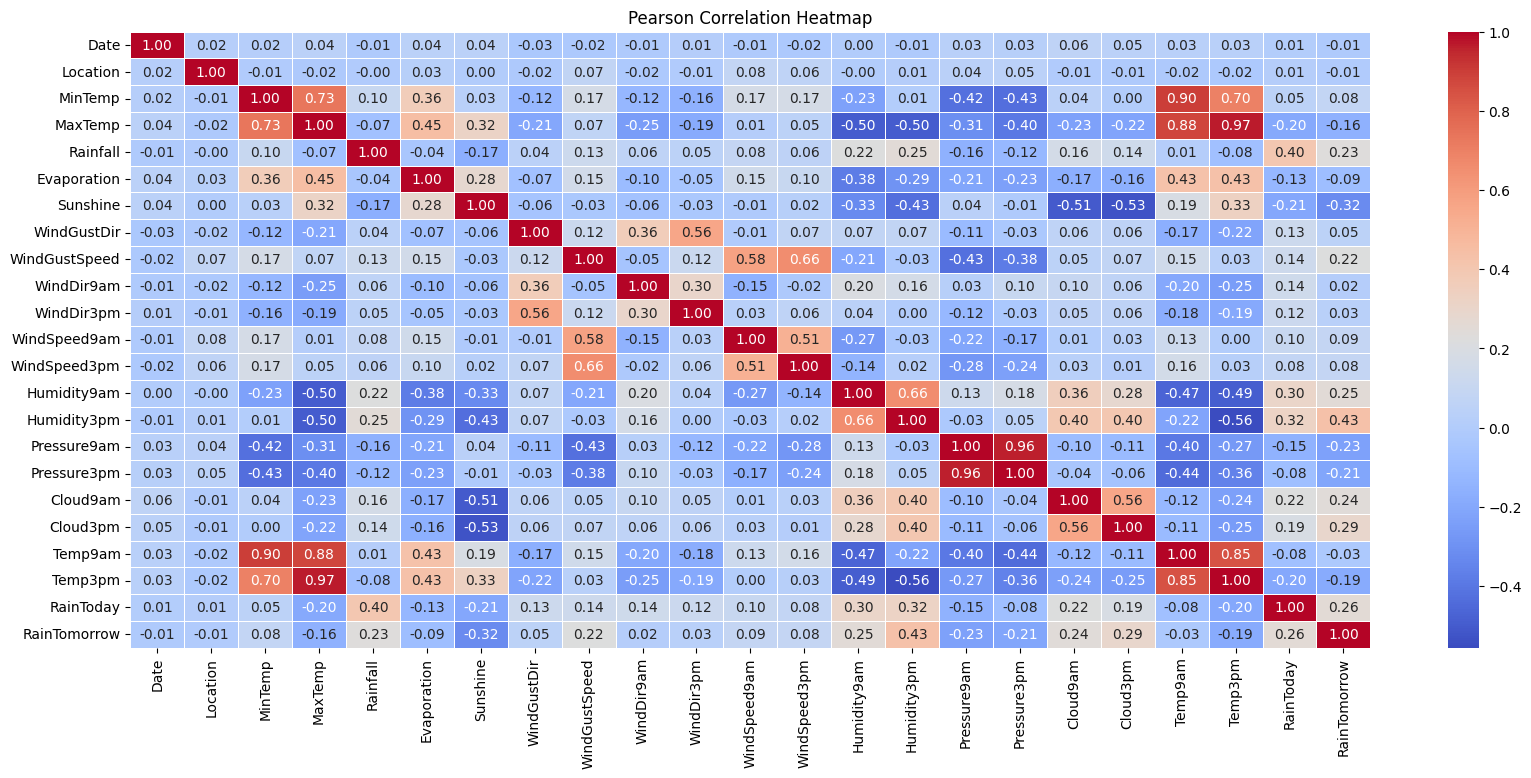

In [16]:
correlation_matrix = df_standardized.corr(method='pearson')
# print(correlation_matrix)

# Create a heatmap using seaborn
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6928\2253707251.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


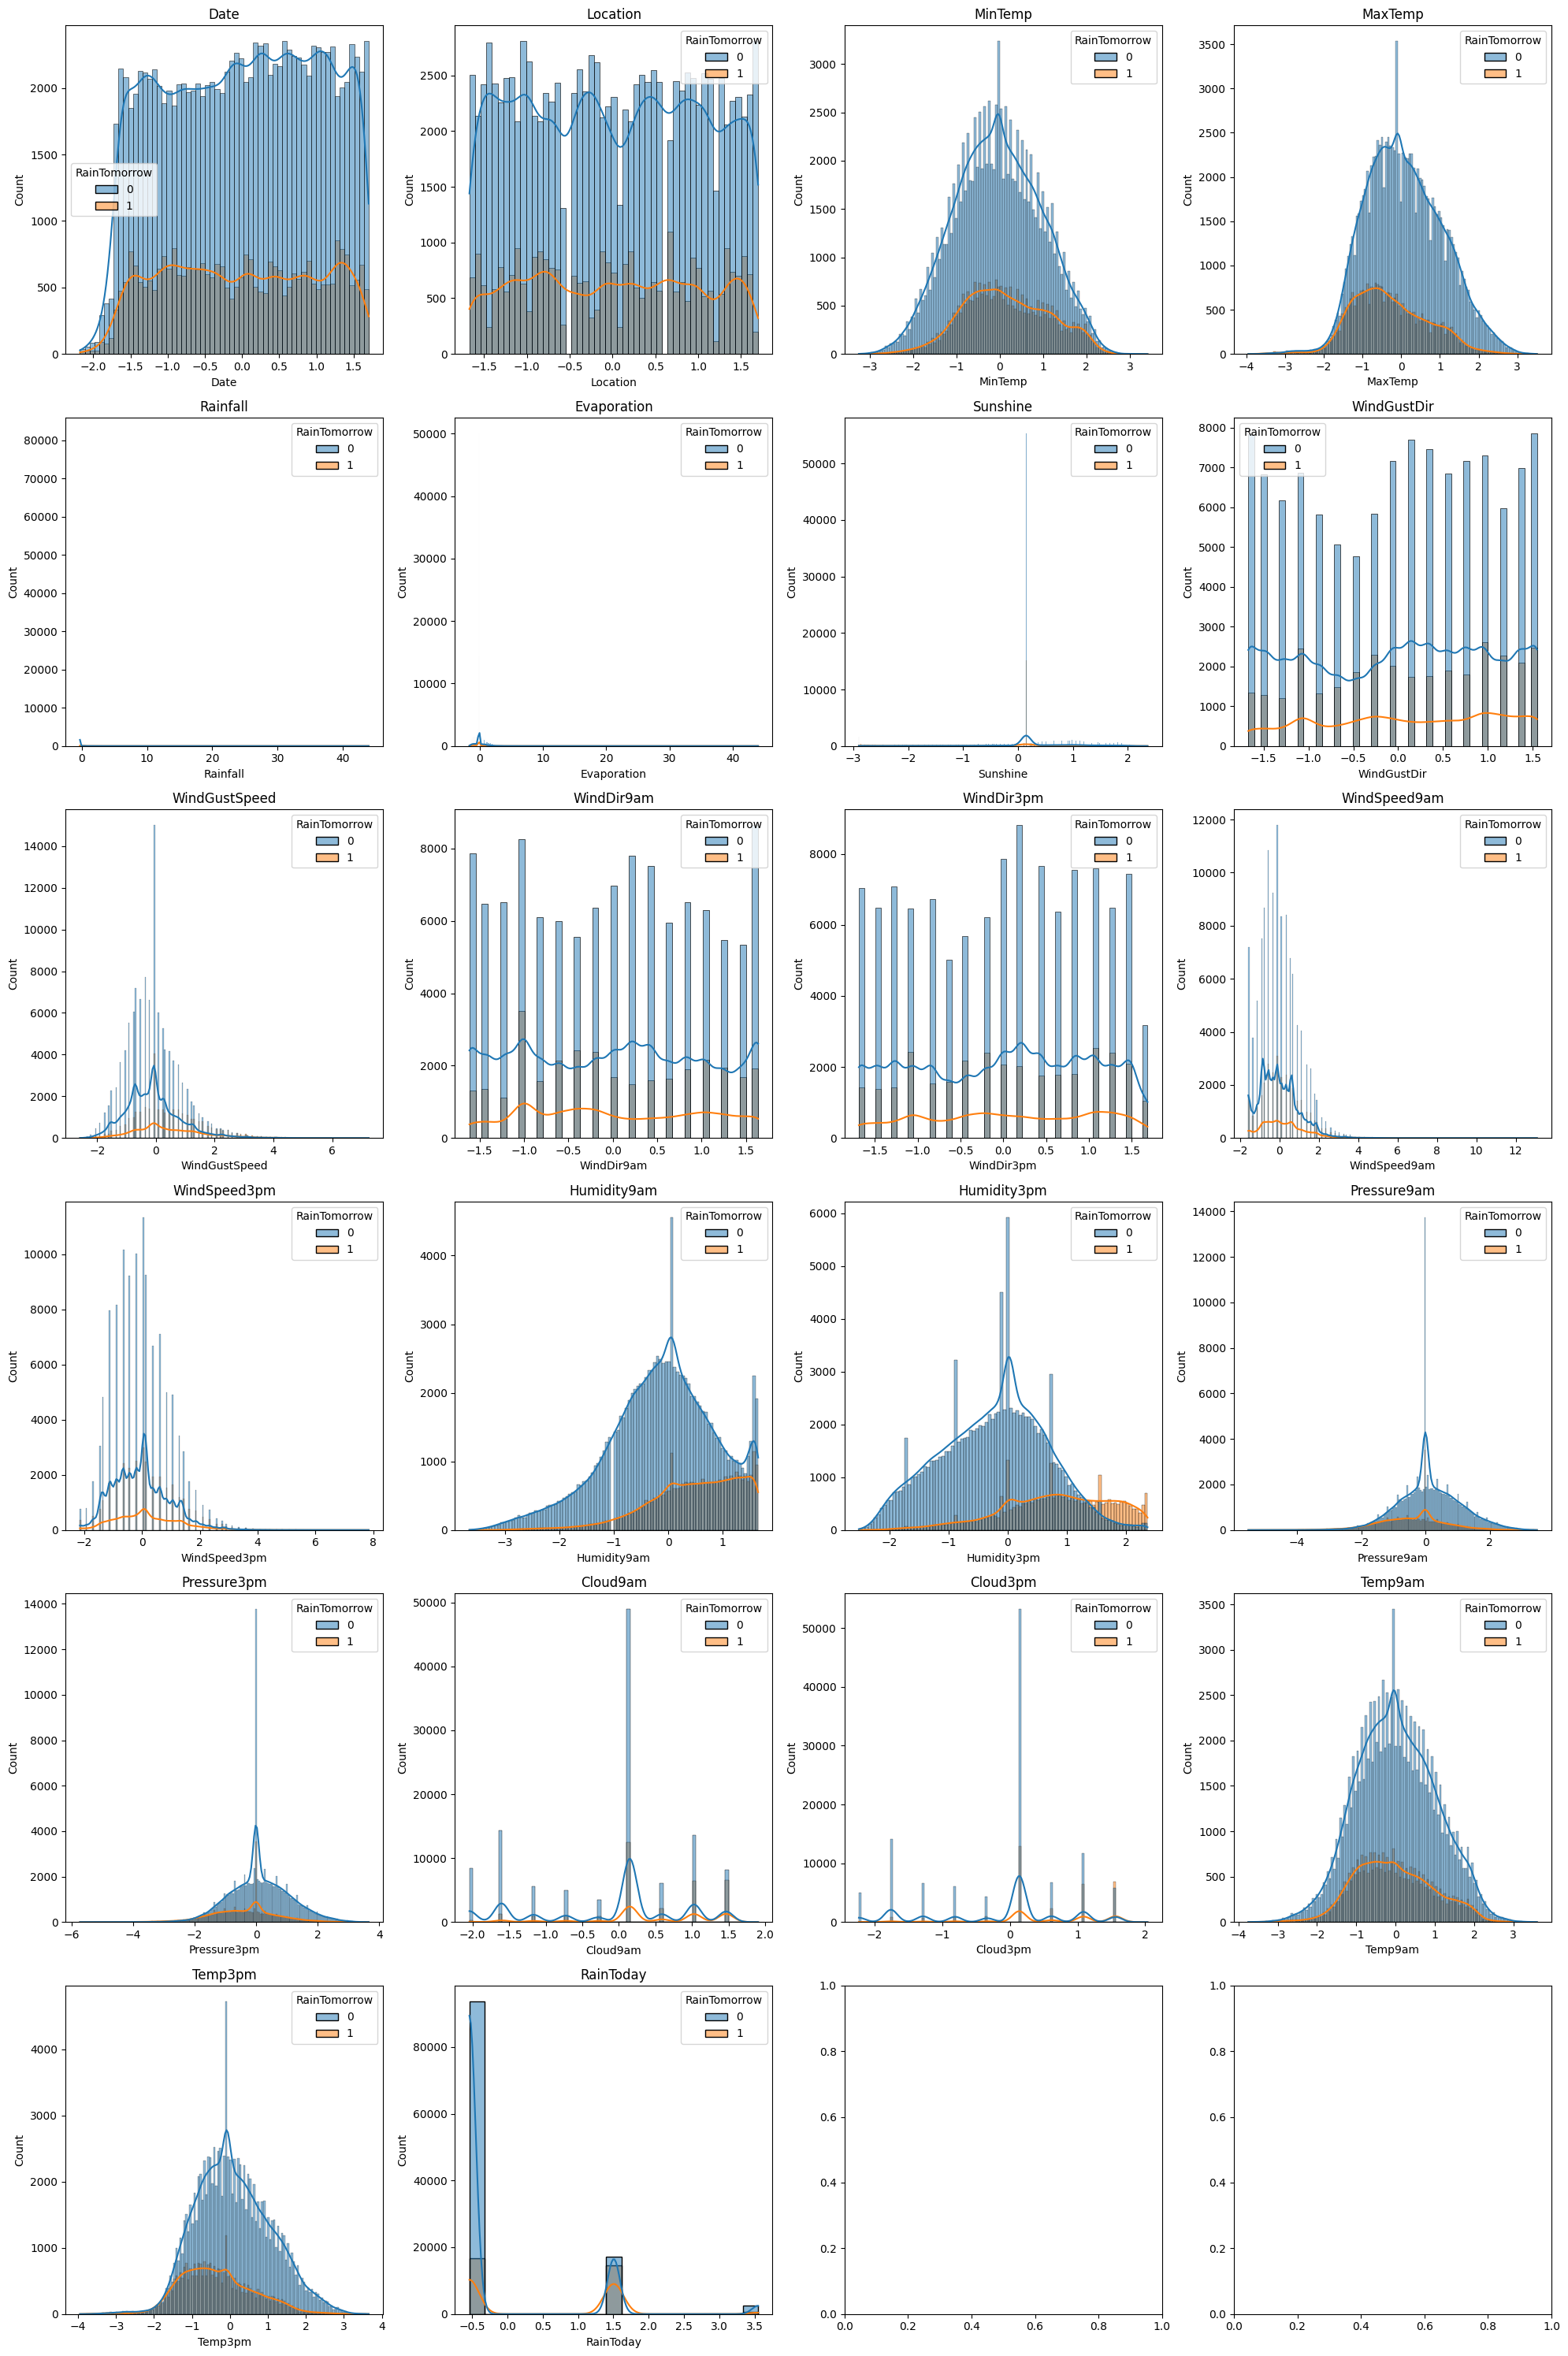

In [15]:
# List of features to plot
features = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
            'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
            'Temp3pm', 'RainToday']

# Determine the number of rows and columns for the subplots
n_features = len(features)
n_cols = 4
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    if feature in df_standardized.columns:
        sns.histplot(data=df_standardized, x=feature, hue='RainTomorrow', kde=True, ax=axes[i])
        axes[i].set_title(feature)
    else:
        fig.delaxes(axes[i])  # Remove empty subplot if feature is missing

# Adjust layout
plt.tight_layout()
plt.show()
